In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from defectlib import maybe_pickle

In [10]:
maybe_pickle('./defect_tensors_D10/')

100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


In [11]:
defect_dict = load_tensors_all('./defect_tensors_D10/WLANRF/', width=128)

(176, 284, 190)
(17, 284, 190)
(101, 192, 276)
(9, 192, 276)


In [12]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 303
number of class 0: 277
	number of SN: 10
number of class 10: 26
	number of SN: 1


In [13]:
sns[labels == 10]

array(['F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/6A',
       'F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A',
       'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A',
       'F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A',
       'F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/6A',
       'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A',
       'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/2A',
       'F3Y64860PHLGY4TA/2A', 'F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/2A',
       'F3Y64860PHLGY4TA/6A', 'F3Y64860PHLGY4TA/2A'], 
      dtype='|S19')

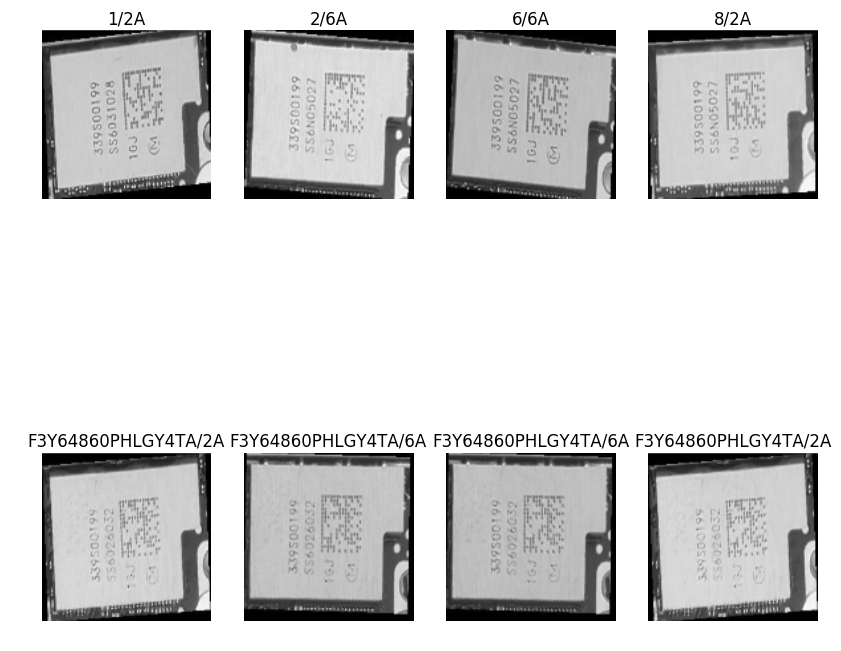

In [14]:
display_tensor(tensors, labels, sns)

In [15]:
from defectlib import GroupKFold_modeling

In [18]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=11, nb_epoch=10, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 9
Train on 273 samples, validate on 30 samples
Epoch 1/10
273/273 [==============================] - 7s - loss: 0.9252 - acc: 0.8059 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 2/10
273/273 [==============================] - 6s - loss: 0.3863 - acc: 0.8901 - val_loss: 0.0166 - val_acc: 1.0000
Epoch 3/10
273/273 [==============================] - 6s - loss: 0.3817 - acc: 0.8938 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 4/10
273/273 [==============================] - 6s - loss: 0.3204 - acc: 0.8864 - val_loss: 0.0144 - val_acc: 1.0000
Epoch 5/10
273/273 [==============================] - 6s - loss: 0.3590 - acc: 0.8938 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 6/10
273/273 [==============================] - 7s - loss: 0.2723 - acc: 0.9011 - val_loss: 0.0255 - val_acc: 1.0000
Epoch 7/10
273/273 [==============================] - 6s - loss: 0.2094 - acc: 0.9341 - val_loss: 0.0251 - val_acc: 1.0000
Epoch 8/10
273/273 [==

In [19]:
accuracy_escape_list

[(0, '9', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '1', 1.0, 1.0),
 (0, '0', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (10, 'F3Y64860PHLGY4TA', 0.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '6', 1.0, 1.0)]